# Problem Statement

The client is facing a problem in identifying the right people for promotion (only for manager position and below) and prepare them in time.The company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.


They have provided multiple attributes around Employee's past and current performance along with demographics. Now, the task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

# Data Description

1) employee_id         --->Unique ID for employee

2) department          --->Department of employee

3) region              --->Region of employment (unordered)

4) education           --->Education Level

5) gender              --->Gender of Employee

6) recruitment_channel --->Channel of recruitment for employee

7) no_of_training      --->no of other trainings completed in previous year on soft skills, technical skills etc.

8) age                 --->Age of Employee

9) previous_year_rating--->Employee Rating for the previous year

10) length_of_service   --->Length of service in years

11) KPIs_met >80%       --->if Percent of KPIs(Key performance Indicators) >80% then 1 else 0

12) awards_won?         --->if awards won during previous year then 1 else 0

13) avg_training_score  --->Average score in current training evaluations

14) is_promoted         --->(Target) Recommended for promotion

# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [ ]:
train=pd.read_csv(r'/content/train_LZdllcl.csv')
test=pd.read_csv(r'/content/test_2umaH9m.csv')

In [ ]:
print('Shape of train Data',train.shape)
print('Shape of test Data',test.shape)

Shape of train Data (54808, 14)
Shape of test Data (23490, 13)


In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


In [ ]:
train.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,NaN,m,sourcing


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Exploring the Features

In [ ]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

1.employee_id --->Unique ID for employee

In [ ]:
train.employee_id.value_counts()

65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: employee_id, Length: 54808, dtype: int64

Since employee_id is unique for every employee,This Feature Does not impact the target variable.  



  2)department  --->Department of employee

In [ ]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

Department Feature consists 9 different categories,Where most of the employees from Sales&Marketing and Operations.

3) region    --->This Feature states that From which region the employees are coming From,Highest number of employees are coming from region_2,These regions are in Unordered format.

In [ ]:
train.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

4) education        --->Education Level

In [ ]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

It is categorical variable with 3 different categories: Below Secondary,Bachelor's & Master's & above. 70% of the employees have Bachelor's degree.

5) Gender: gender is a categorical variables with 2 categories: Male and Female.

In [ ]:
train.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

Male Employees are twice in the company compared to Female Employees

6) recruitment_channel --->Channel of recruitment for employee

In [ ]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In Recruitment channel most of the employees from the other Followed by Sourcing.

 7) no_of_training      --->no of other trainings completed in previous year on soft skills, technical skills etc.

In [ ]:
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

The no_of_trainings has 10 categories,where most of the employees undergoes atleast one training followed by Two.

8) age                 --->Age of Employee


In [ ]:
train.age.value_counts().sort_values()

21      98
20     113
59     209
58     213
60     217
22     231
57     238
56     264
55     294
54     313
52     351
53     364
51     389
23     428
49     441
50     521
47     557
48     557
46     697
45     760
24     845
44     847
43     992
42    1149
41    1289
25    1299
40    1663
39    1695
38    1923
26    2060
37    2165
36    2517
35    2711
27    2827
34    3076
28    3147
33    3210
29    3405
31    3534
32    3534
30    3665
Name: age, dtype: int64

The age of the employees ranges from 20 to 60,Where maximum employees are From age 30.

9) previous_year_rating--->Employee Rating for the previous year

In [ ]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

Previous year rating ranges from 1 to 5,Average rating of the employees is the 3.3 and lowest count of ratings observed in 2.0

10) length_of_service   --->Length of service in years

In [ ]:
train.length_of_service.value_counts()

3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794
13     687
15     593
14     549
16     548
17     432
18     392
19     329
20     128
21      78
24      70
23      65
22      61
25      51
26      41
27      36
28      30
29      30
31      20
30      12
32      10
33       9
34       4
37       1
Name: length_of_service, dtype: int64

Length of service ranges from 1 to 37,where maximum employees service lies between 1 to 10 years.

11) KPIs_met >80%       --->if Percent of KPIs(Key performance Indicators) >80% then 1 else 0

In [ ]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

Key performance indicator states that if the percentage of the employee is greater than 80% then it will be considered as 1  

Other wise it will be considered as 0.

12) awards_won?         --->if awards won during previous year then 1 else 0

In [ ]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

Awards won column states that where the employee in the previous won the award or not,We can say around 97% of the people did
not won the award.

13) avg_training_score  --->Average score in current training evaluations.

In [ ]:
print('Minimum Average Training score:',train.avg_training_score.min())
print('Maximum Average Training score:',train.avg_training_score.max())
print('Average Training score:',train.avg_training_score.mean())

Minimum Average Training score: 39
Maximum Average Training score: 99
Average Training score: 63.38675010947307


The Average training score ranges from 39 to 99,This Feature states that the average score of current training evaluations.

14) is_promoted         --->(Target) Recommended for promotion

In [ ]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Is promoted column states that whether the employee is fit for the promotion or not ,0 states that employee not fit for
promotion whereas 1 states That employee is eligible for Promotion.Around 92% of the employees didnot eligible for the promotion.

# EDA

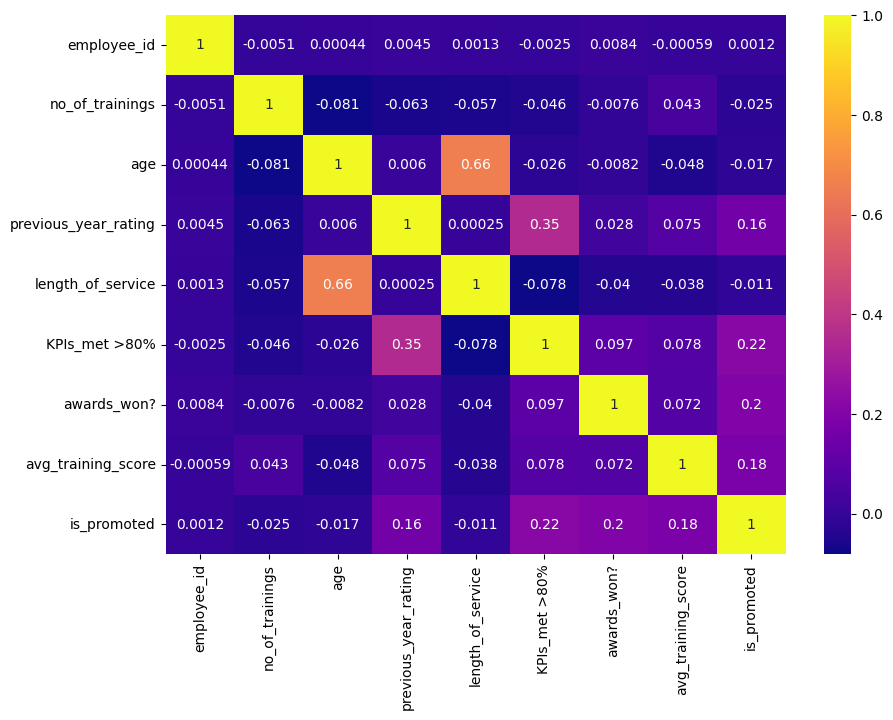

In [ ]:
k=train.select_dtypes(include=['int','float'])
cor=k.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True,cmap='plasma')
plt.show()

The Target variable is not co-related with other variables.

where as age is moderately co-related with length_of_service.

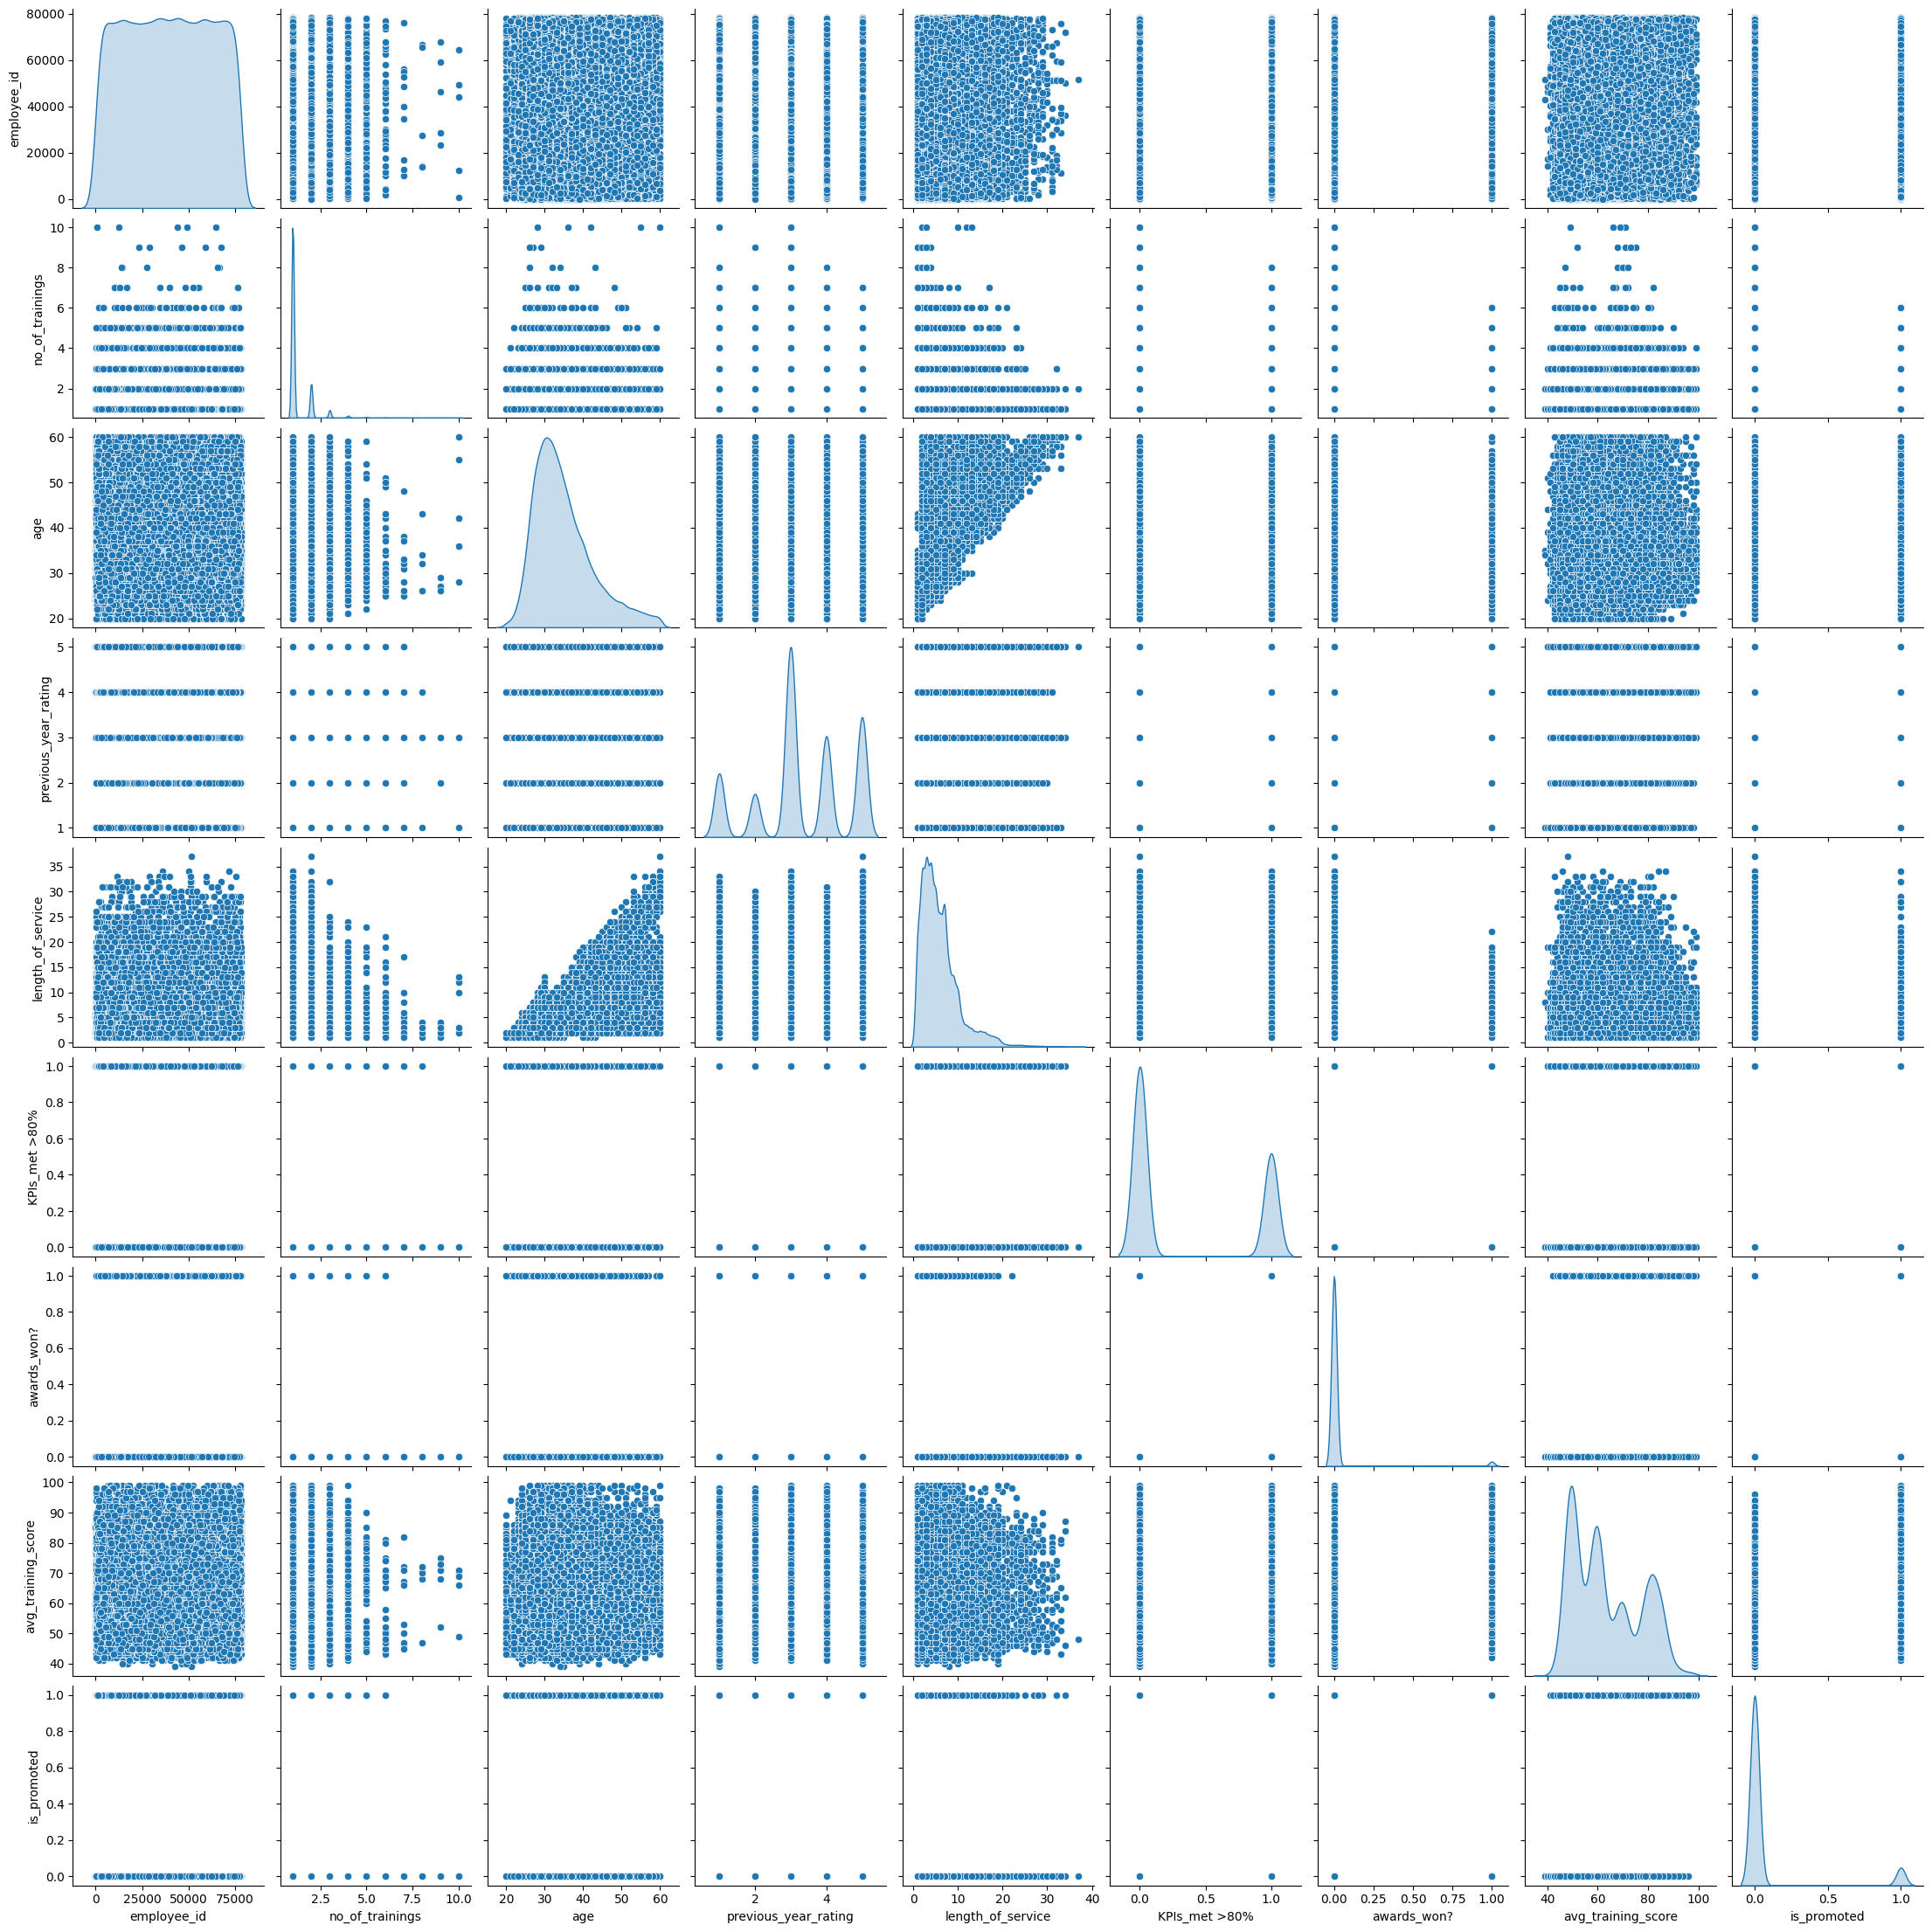

In [ ]:
sns.pairplot(train,diag_kind='kde')

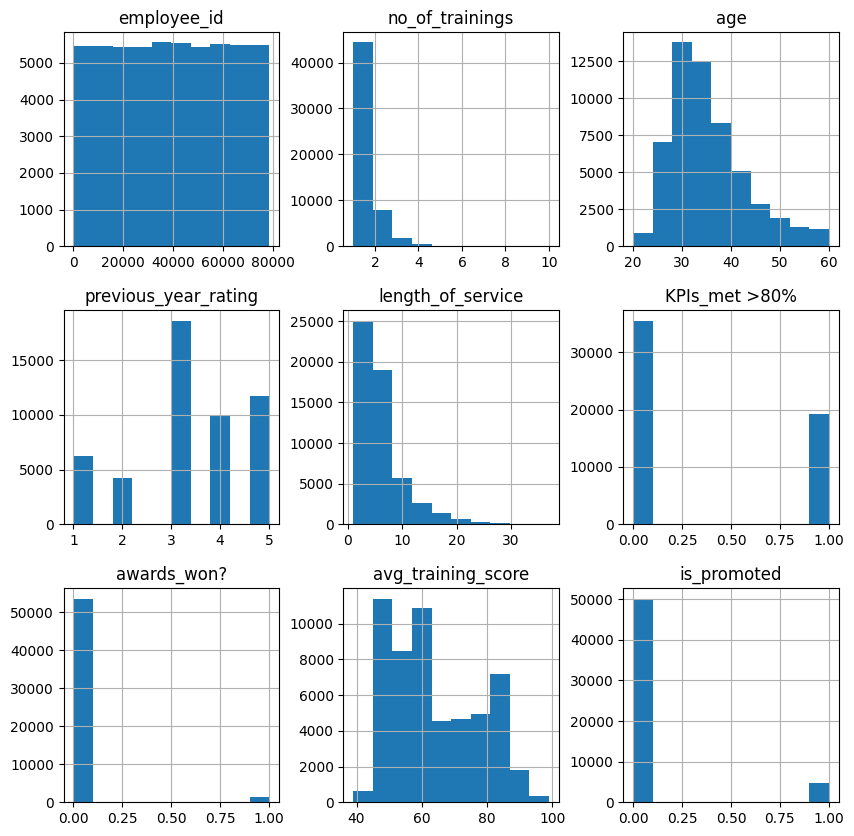

In [ ]:
train.hist(figsize=(10,10))
plt.show()

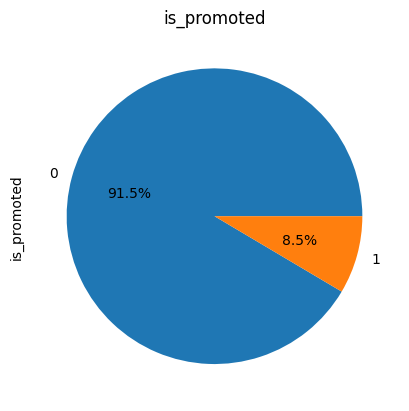

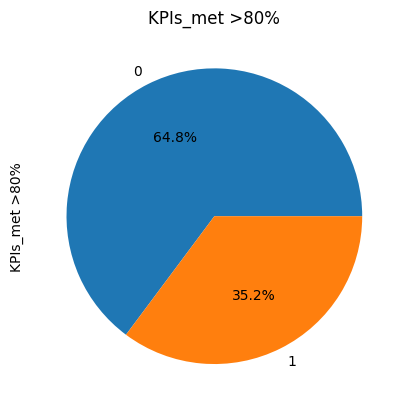

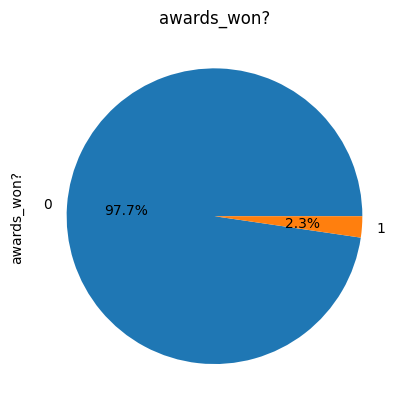

In [ ]:
z=['is_promoted','KPIs_met >80%', 'awards_won?']
for i in z:
    plt.title(i)
    train[i].value_counts().plot(kind='pie',autopct='%.1f%%')
    plt.show()


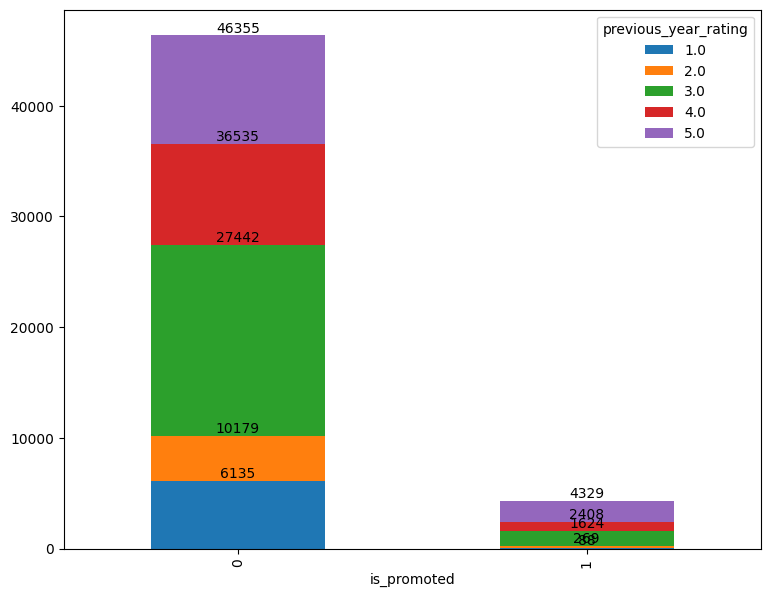

In [ ]:
ax=pd.crosstab(train['is_promoted'],train['previous_year_rating']).plot(kind='bar',stacked=True,figsize=(9,7))
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

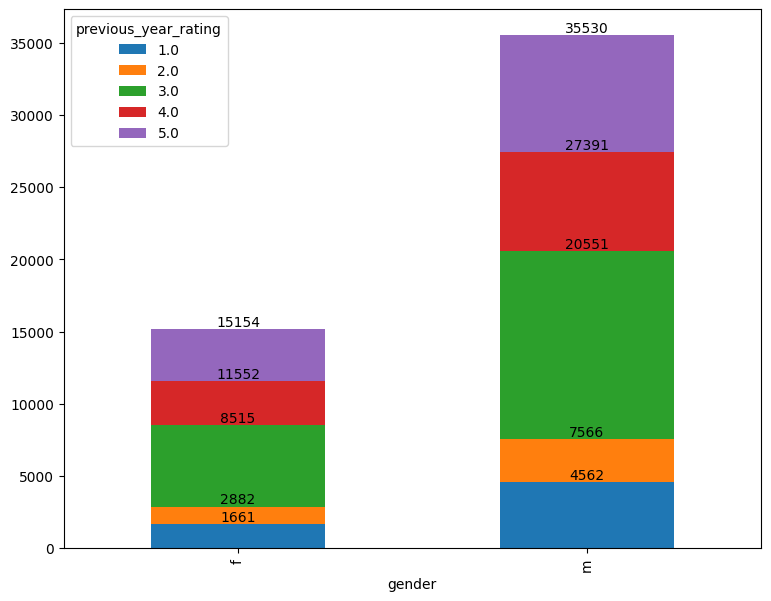

In [ ]:
ax=pd.crosstab(train['gender'],train['previous_year_rating']).plot(kind='bar',stacked=True,figsize=(9,7))
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

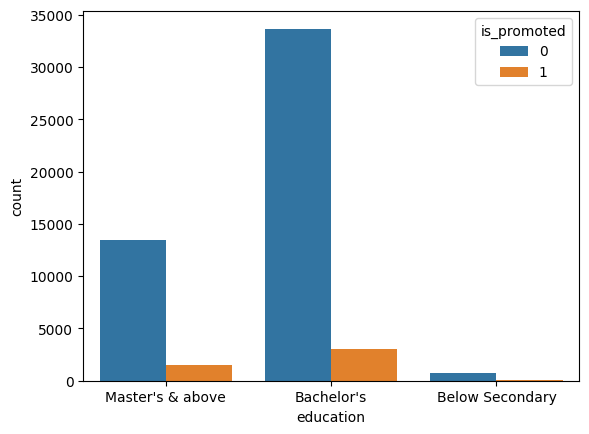

In [ ]:
sns.countplot(x = 'education', hue = 'is_promoted', data = train)
plt.show()

In [ ]:
train['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [ ]:
train['avg_training_score'].skew()

0.45190808551707995

In [ ]:
train['age'].describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [ ]:
train['age'].skew()

1.0074317710382241

<Axes: xlabel='is_promoted'>

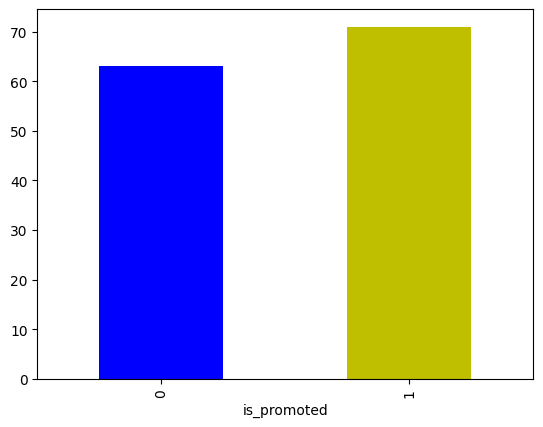

In [ ]:
np.round(train['avg_training_score'].groupby(train['is_promoted']).mean()).plot(kind='bar',color=['b','y'])

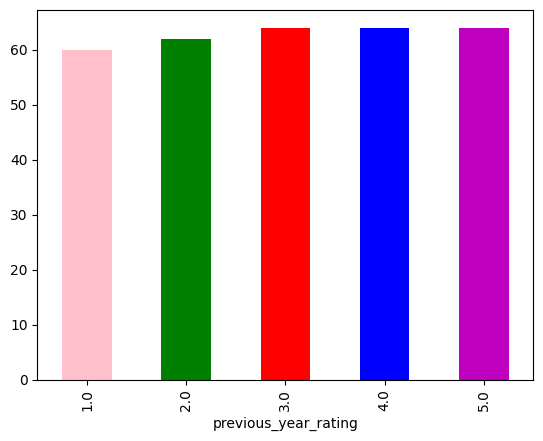

In [ ]:
np.round(train['avg_training_score'].groupby(train['previous_year_rating']).mean()).plot(kind='bar',color=['pink','green','red','blue','m','y'])
plt.show()

<Axes: xlabel='gender'>

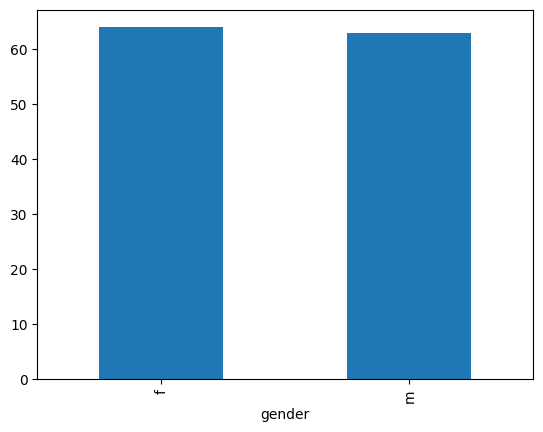

In [ ]:
np.round(train['avg_training_score'].groupby(train['gender']).mean()).plot(kind='bar')

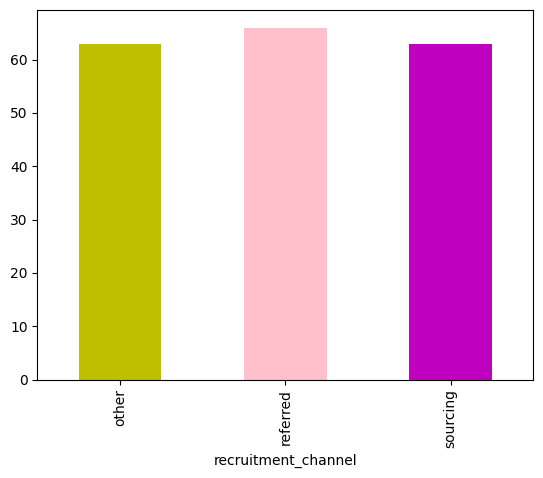

In [ ]:
np.round(train['avg_training_score'].groupby(train['recruitment_channel']).mean()).plot(kind='bar',color=['y','pink','m'])
plt.show()

# Hypothesis Testing

In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Ttest

Test Null Average avg_training_score of is_promoted equal




In [ ]:
train.avg_training_score.groupby(train.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [ ]:
train.avg_training_score.groupby(train.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
Not_prom=train[train['is_promoted']==0]
prom=train[train['is_promoted']==1]

In [ ]:
Not_prom.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
prom.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1


In [ ]:
#Test Null Average avg_training_score of is_promoted equal
ttest_ind(Not_prom['avg_training_score'],prom['avg_training_score'],equal_var=False)

# Since pvalue=7.662329172468838e-291 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

TtestResult(statistic=-38.82675007357188, pvalue=7.662329172468838e-291, df=5363.307824110073)

Test Null Average Length_of_service of is_promoted equal

In [ ]:
train.length_of_service.groupby(train.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [ ]:
train.length_of_service.groupby(train.is_promoted).var()

is_promoted
0    18.387278
1    16.062239
Name: length_of_service, dtype: float64

In [ ]:
#Test Null Average Lenght_of_service of is_promoted equal
ttest_ind(Not_prom['length_of_service'],prom['length_of_service'],equal_var=False)

# Since pvalue=0.008262946987836755 is less than 0.05, Reject Null
# Difference in Means is Statistically Significant

TtestResult(statistic=2.6420549711884886, pvalue=0.008262946987836755, df=5708.750739466446)

## ANOVA

Test Null Average avg_training_score of recruitment_channel equal

Test Null Average length_of_service of  recruitment_channel equal

In [ ]:
train.avg_training_score.groupby(train.recruitment_channel).mean()

recruitment_channel
other       63.362839
referred    66.182137
sourcing    63.280620
Name: avg_training_score, dtype: float64

In [ ]:
train.avg_training_score.groupby(train.recruitment_channel).var()

recruitment_channel
other       177.989513
referred    193.411144
sourcing    178.760475
Name: avg_training_score, dtype: float64

In [ ]:
other=train[train.recruitment_channel=='other']
referred=train[train.recruitment_channel=='referred']
sourcing=train[train.recruitment_channel=='sourcing']

In [ ]:
other.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0


In [ ]:
referred.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
80,53092,Technology,region_2,Bachelor's,m,referred,1,47,3.0,7,0,0,79,0
114,17894,Sales & Marketing,region_2,Bachelor's,m,referred,1,34,5.0,5,0,0,49,0
246,63237,Technology,region_22,Bachelor's,m,referred,1,26,4.0,2,0,0,82,0
281,30682,Technology,region_2,Bachelor's,m,referred,2,29,4.0,6,0,0,75,0
309,26563,Procurement,region_2,Bachelor's,f,referred,1,33,3.0,3,1,0,67,0


In [ ]:
sourcing.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [ ]:
from scipy.stats import f_oneway

In [ ]:
#Test Null Average avg_training_score of recruitment_channel equal
f_oneway(other['avg_training_score'],referred['avg_training_score'],sourcing['avg_training_score'])

# Since pvalue=6.585805990029605e-12 is less than 0.05, Reject Null

F_onewayResult(statistic=25.758203095600134, pvalue=6.585805990029605e-12)

In [ ]:
#Test Null Average length_of_service of  recruitment_channel equal
f_oneway(other['length_of_service'],referred['length_of_service'],sourcing['length_of_service'])

# Since pvalue=1.0290643395315436e-11 is less than 0.05, Reject Null

F_onewayResult(statistic=25.31146884827052, pvalue=1.0290643395315436e-11)

## Chi Square Test

Test Null No Association between is_promoted and gender

Test Null No Association between KPISmet and is_promoted


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
#Test Null No Association between is_promoted and gender
chi2_contingency(pd.crosstab(train['is_promoted'],train['gender']))

# Since pvalue=0.009765091521176657 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [ ]:
#Test Null No Association between KPISmet and is_promoted
chi2_contingency(pd.crosstab(train['KPIs_met >80%'],train['is_promoted']))

# Since pvalue=0.0 is less than 0.05, Reject Null

Chi2ContingencyResult(statistic=2689.3220548467057, pvalue=0.0, dof=1, expected_freq=array([[32492.01539921,  3024.98460079],
       [17647.98460079,  1643.01539921]]))

# Data preprocessing

In [ ]:
print('Train shape',train.shape)
print('Test shape',test.shape)

Train shape (54808, 14)
Test shape (23490, 13)


In [ ]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
#Replacing Null values in Education with most repeatant value(Mode)
train['education']=train['education'].fillna(train['education'].mode()[0])

In [ ]:
train.previous_year_rating.median()

3.0

In [ ]:
#Replacing  Null values in Previous_year_rating with median
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].median())

In [ ]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Encoding

In [ ]:
train.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing


In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Dropping employee_id cause it have no effect on the Dependent Variable
train.drop('employee_id',axis=1,inplace=True)

In [ ]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Using get_dummies To encode the categorical Columns and dropping First to avoid Multicollinearity
train=pd.get_dummies(train,drop_first=True)

In [ ]:
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting The Data

In [ ]:
X=train.drop('is_promoted',axis=1)
Y=train['is_promoted']

# Cleaning Test Data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54808 non-null  int64  
 1   age                           54808 non-null  int64  
 2   previous_year_rating          54808 non-null  float64
 3   length_of_service             54808 non-null  int64  
 4   KPIs_met >80%                 54808 non-null  int64  
 5   awards_won?                   54808 non-null  int64  
 6   avg_training_score            54808 non-null  int64  
 7   is_promoted                   54808 non-null  int64  
 8   department_Finance            54808 non-null  uint8  
 9   department_HR                 54808 non-null  uint8  
 10  department_Legal              54808 non-null  uint8  
 11  department_Operations         54808 non-null  uint8  
 12  department_Procurement        54808 non-null  uint8  
 13  d

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
test.education.value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [ ]:
#Replacing Null values in Education with most repeatant value(Mode)
test['education']=test['education'].fillna(test['education'].mode()[0])

In [ ]:
train.previous_year_rating.median()

3.0

In [ ]:
#Replacing  Null values in Previous_year_rating with median
test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].median())

In [ ]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
test.drop('employee_id',axis=1,inplace=True)

In [ ]:
test.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Technology,region_26,Bachelor's,m,sourcing
1,HR,region_4,Bachelor's,f,other
2,Sales & Marketing,region_13,Bachelor's,m,other
3,Procurement,region_2,Bachelor's,f,other
4,Finance,region_29,Bachelor's,m,sourcing
...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing
23486,Technology,region_25,Bachelor's,m,sourcing
23487,HR,region_16,Bachelor's,f,sourcing
23488,Procurement,region_31,Bachelor's,m,sourcing


In [ ]:
test=pd.get_dummies(test,drop_first=True)

In [ ]:
test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,31,3.0,5,0,0,51,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,30,4.0,7,0,0,61,1,0,0,...,0,0,0,0,0,0,0,1,0,1


# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


### Logistic Regression

In [ ]:
lr=LogisticRegression().fit(X,Y)

In [ ]:
lr.score(X,Y)

0.920814479638009

In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(lr,X,Y)

In [ ]:
cv.mean()

0.9188987190673419

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,RocCurveDisplay

In [ ]:
lr_pred=lr.predict(X_test)

Model Evaluation

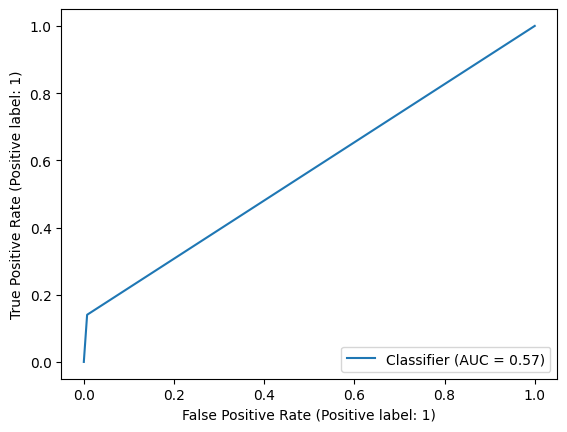

In [ ]:
RocCurveDisplay.from_predictions(y_test,lr_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,lr_pred))

[[9934   73]
 [ 821  134]]


In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10007
           1       0.65      0.14      0.23       955

    accuracy                           0.92     10962
   macro avg       0.79      0.57      0.59     10962
weighted avg       0.90      0.92      0.89     10962



### Decision Tree

In [ ]:
dt=DecisionTreeClassifier(max_depth=14).fit(X,Y)

In [ ]:
dt.score(X,Y)

0.9491132681360386

In [ ]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(dt,X,Y)

In [ ]:
cv

array([0.93596059, 0.93431856, 0.93732895, 0.9377794 , 0.93458626])

In [ ]:
cv.mean()

0.9359947521558121

In [ ]:
dt_pred=dt.predict(X_test)

Model Evaluation

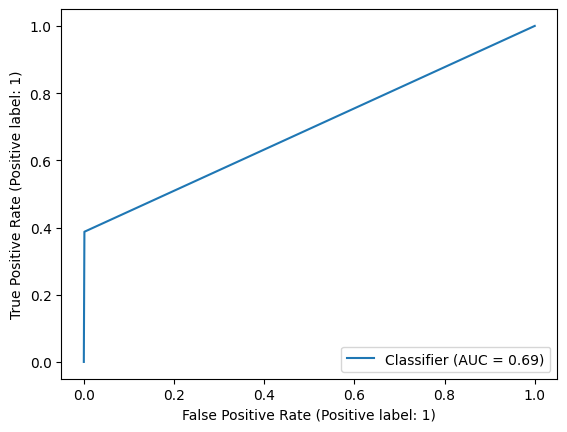

In [ ]:
RocCurveDisplay.from_predictions(y_test,dt_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,dt_pred))

[[9994   13]
 [ 585  370]]


In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10007
           1       0.97      0.39      0.55       955

    accuracy                           0.95     10962
   macro avg       0.96      0.69      0.76     10962
weighted avg       0.95      0.95      0.93     10962



### Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(max_depth=17,n_estimators=1000).fit(X,Y)
rf.score(X,Y)

0.9410305064954021

In [ ]:
cv1=cross_val_score(rf,X,Y)
cv1.mean()

0.9323273800140056

In [ ]:
rf_pred=rf.predict(X_test)

Model Evaluation

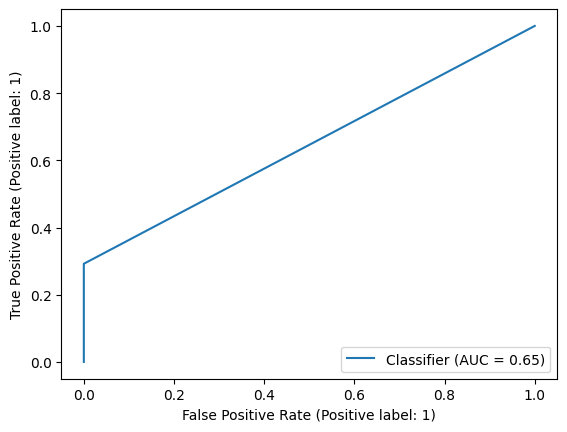

In [ ]:
RocCurveDisplay.from_predictions(y_test,rf_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,rf_pred))

[[10007     0]
 [  676   279]]


In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10007
           1       1.00      0.29      0.45       955

    accuracy                           0.94     10962
   macro avg       0.97      0.65      0.71     10962
weighted avg       0.94      0.94      0.92     10962



## Gradient Boosting Classifier

In [ ]:
Gb=GradientBoostingClassifier(n_estimators=10000).fit(X,Y)
Gb.score(X,Y)

0.9671580791125383

In [ ]:
gb_pred=Gb.predict(X_test)

Model Evaluation

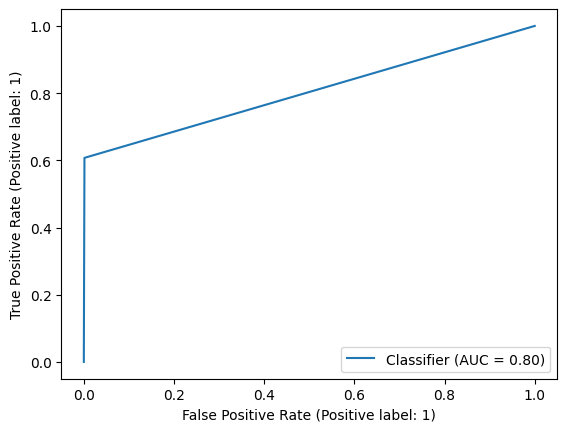

In [ ]:
RocCurveDisplay.from_predictions(y_test,gb_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,gb_pred))

[[9995   12]
 [ 562  393]]


In [ ]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10007
           1       0.97      0.41      0.58       955

    accuracy                           0.95     10962
   macro avg       0.96      0.71      0.78     10962
weighted avg       0.95      0.95      0.94     10962



### Support Vector Classifier

In [ ]:
sv=SVC().fit(X,Y)
sv.score(X,Y)

0.9148299518318493

In [ ]:
sv_pred=sv.predict(X_test)

Model Evaluation

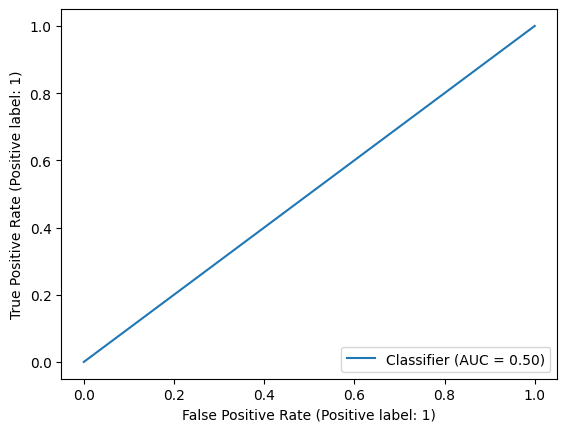

In [ ]:
RocCurveDisplay.from_predictions(y_test,sv_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,sv_pred))

[[10007     0]
 [  955     0]]


In [ ]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10007
           1       0.00      0.00      0.00       955

    accuracy                           0.91     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.83      0.91      0.87     10962



### KNN

In [ ]:
knc=KNeighborsClassifier().fit(X,Y)
knc.score(X,Y)

0.931104948182747

In [ ]:
knc_pred=knc.predict(X_test)

Model evaluation

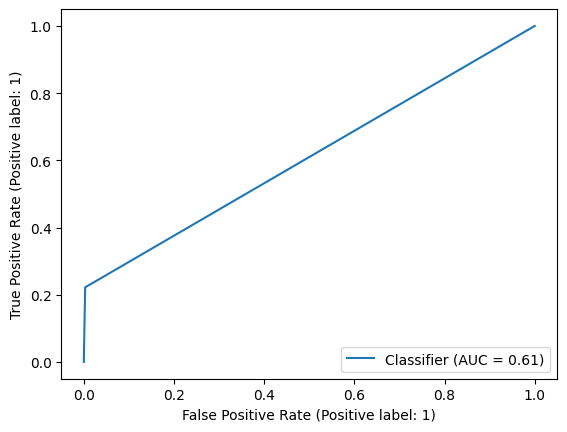

In [ ]:
RocCurveDisplay.from_predictions(y_test,knc_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,knc_pred))

[[9977   30]
 [ 743  212]]


In [ ]:
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10007
           1       0.88      0.22      0.35       955

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.66     10962
weighted avg       0.93      0.93      0.91     10962



### XG Classifier

In [ ]:
xgc=XGBClassifier(n_estimators=1000).fit(X,Y)
xgc.score(X,Y)

0.9992336885126258

In [ ]:
XG_pred=xgc.predict(X_test)

Model Evaluation

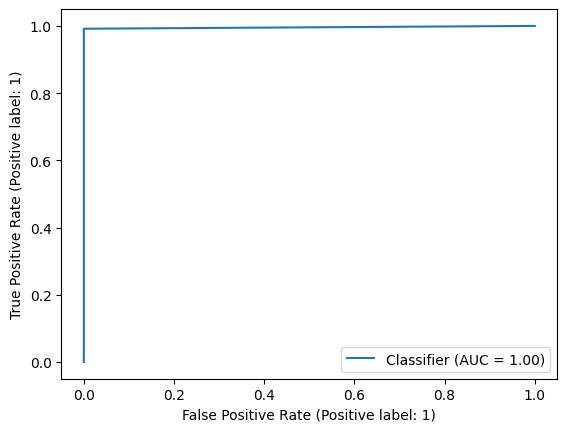

In [ ]:
RocCurveDisplay.from_predictions(y_test,XG_pred)
plt.show()

In [ ]:
print(confusion_matrix(y_test,XG_pred))

[[10007     0]
 [    8   947]]


In [ ]:
print(classification_report(y_test,XG_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10007
           1       1.00      0.99      1.00       955

    accuracy                           1.00     10962
   macro avg       1.00      1.00      1.00     10962
weighted avg       1.00      1.00      1.00     10962



### Predictions on Test Data

Logistic Regression

In [ ]:
logictest=lr.predict(test)

In [ ]:
pd.DataFrame(logictest).to_csv('logisticRegression.csv')

Decision Tree Classifier

In [ ]:
dttest=dt.predict(test)

In [ ]:
pd.DataFrame(dttest).to_csv('DecisionTreeclas.csv')

Random Forest

In [ ]:
rftest=rf.predict(test)

In [ ]:
pd.DataFrame(rftest).to_csv('RandomForest.csv')

Support vector machine

In [ ]:
svtest=sv.predict(test)

In [ ]:
pd.DataFrame(svtest).to_csv('Supportvectorm.csv')

K Nearst Neighbors

In [ ]:
knntest=knc.predict(test)

In [ ]:
pd.DataFrame(knntest).to_csv('Knearestneighbors.csv')

Gradient Boost

In [ ]:
gbtest=Gb.predict(test)

In [ ]:
pd.DataFrame(gbtest).to_csv('GradientBoost7.csv')

XG Boost

In [ ]:
xgtest=xgc.predict(test)

In [ ]:
pd.DataFrame(xgtest).to_csv('Xgboost3.csv')

### F1 Score of Different Models

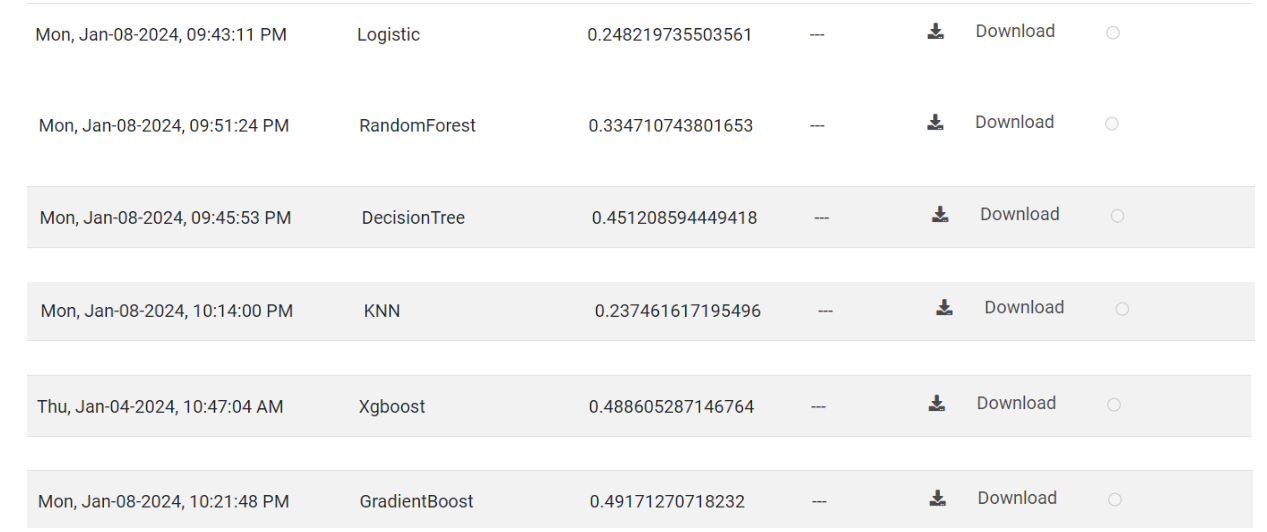

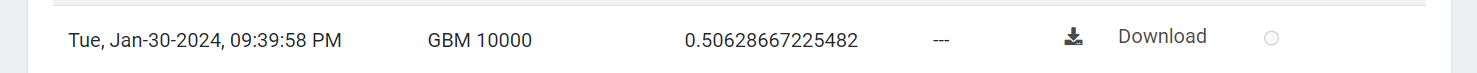

### Rank in Hackathon

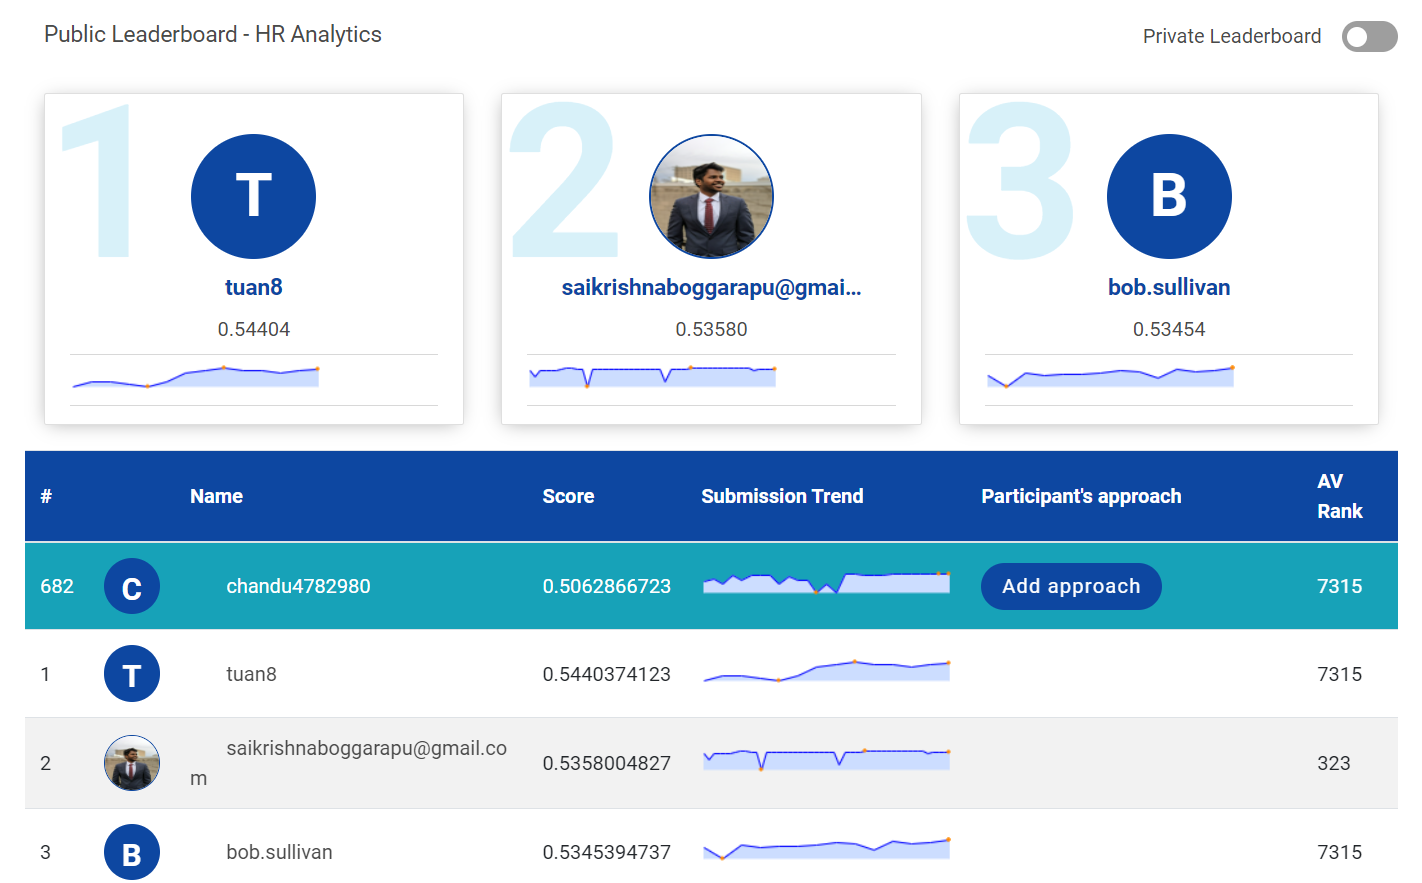)